In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.features.importances import FeatureImportances

![](https://akm-img-a-in.tosshub.com/indiatoday/images/story/201601/interview-647-x--404_011616120909.jpg)

https://www.kaggle.com/vishnusraghavan/the-interview-attendance-problem
    
The Dataset consists of details of 1200 + candidates and the interviews they have attended during the course of the period 2014-2016.


In [2]:
iview = pd.read_csv('Interview.csv')
iview.head()

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 1,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
1,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 2,Male,Chennai,...,Yes,Yes,Yes,No,Single,NaN,NaN,NaN,NaN,NaN
2,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 3,Male,Chennai,...,NaN,NaN,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
3,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 4,Male,Chennai,...,Yes,Yes,Uncertain,No,Single,NaN,NaN,NaN,NaN,NaN
4,13.02.2015,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Routine,Scheduled Walkin,Candidate 5,Male,Chennai,...,Yes,Yes,Uncertain,No,Married,NaN,NaN,NaN,NaN,NaN


In [3]:
iview.shape

(1234, 28)

In [4]:
iview.columns

Index(['Date of Interview', 'Client name', 'Industry', 'Location',
       'Position to be closed', 'Nature of Skillset', 'Interview Type',
       'Name(Cand ID)', 'Gender', 'Candidate Current Location',
       'Candidate Job Location', 'Interview Venue',
       'Candidate Native location',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unname

In [5]:
iview.isnull().sum()

Date of Interview                                                                                        1
Client name                                                                                              0
Industry                                                                                                 1
Location                                                                                                 1
Position to be closed                                                                                    1
Nature of Skillset                                                                                       1
Interview Type                                                                                           1
Name(Cand ID)                                                                                            1
Gender                                                                                                   1
Candidate Current Location           

In [6]:
iview = iview.drop(['Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],axis = 1)
#Dropping coloumns with NaN data

In [7]:
iview[iview['Date of Interview'].isna() == True]

,Date of Interview,Client name,Industry,Location,Position to be closed,Nature of Skillset,Interview Type,Name(Cand ID),Gender,Candidate Current Location,...,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
1233,NaN,﻿﻿,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
iview = iview.drop(1233, axis = 0)
#Dropping row with all NaN

In [9]:
iview2 = iview[['Industry',
       'Position to be closed', 'Interview Type','Gender','Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status']]

In [10]:
def func():
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
func()
#showing all possible answers in each selected column

['BFSI', 'Electronics', 'IT', 'IT Products and Services', 'IT Services', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Sceduled walkin', 'Scheduled ', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin ']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['NO', 'Na', 'No', 'Not yet', 'Yes', 'Yet to confirm', 'yes']
['Na', 'No', 'Not Sure', 'Not sure', 'Yes', 'cant Say', 'yes']
['Na', 'No', 'No Dont', 'Yes', 'yes']
['Na', 'No', 'No I have only thi number', 'Yes', 'na', 'yes']
['Na', 'No', 'No- will take it soon', 'Not Yet', 'Not yet', 'Yes', 'na', 'yes']
['Na', 'No', 'No- I need to check', 'Yes', 'na', 'no', 'yes']
['Havent Checked', 'Na', 'Need To Check', 'No', 'Not Sure', 'Not sure', 'Not yet', 'Yes', 'Yet to Check', 'na', 'no', 'yes']
['10.30 Am', '11:00 AM', 'NO', 'No', 'Uncertain', 'Yes', 'yes']
['NO', 'No', 'No ', 'Yes', 'no', 'no ', 'yes',

In [11]:
iview2 = iview2.replace(['Sceduled walkin', 'Scheduled Walk In', 'Scheduled Walkin', 'Walkin', 'Walkin '], 'Walk-in')
iview2 = iview2.replace(['Scheduled '], 'Scheduled')
iview2 = iview2.replace(['Yes', 'yes', 'yes ', 'YES', ' yes', 'Y','10.30 Am', '11:00 AM'], 'y')
iview2 = iview2.replace(['No', 'no', 'no ', 'NO', ' no', 'N', 'Na','na','No I have only thi number',
                        'No- will take it soon', 'n','Havent Checked','No ','No Dont','Not Yet'], 'n')
iview2 = iview2.replace(['Havent Checked', 'Need To Check', 'Not Sure', 'Not sure', 'Not yet', 'Yet to Check', 
                         'Yet to confirm','cant Say','No- I need to check'], 'Uncertain')
iview2 = iview2.replace(['IT Products and Services', 'IT Services'], 'IT')

In [12]:
def func():
    for i in iview2.columns:
        print(np.unique(pd.DataFrame(iview2[i].value_counts()).reset_index()['index']).tolist())
func()
#Show data that is now cleaned with standardized responses

['BFSI', 'Electronics', 'IT', 'Pharmaceuticals', 'Telecom']
['AML', 'Dot Net', 'Niche', 'Production- Sterile', 'Routine', 'Selenium testing', 'Trade Finance']
['Scheduled', 'Walk-in']
['Female', 'Male']
['- Cochin- ', 'Bangalore', 'Chennai', 'Gurgaon', 'Hosur', 'Hyderabad', 'Noida']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['Uncertain', 'n', 'y']
['n', 'y']
['Married', 'Single']


In [13]:
iview2.columns

Index(['Industry', 'Position to be closed', 'Interview Type', 'Gender',
       'Interview Venue',
       'Have you obtained the necessary permission to start at the required time',
       'Hope there will be no unscheduled meetings',
       'Can I Call you three hours before the interview and follow up on your attendance for the interview',
       'Can I have an alternative number/ desk number. I assure you that I will not trouble you too much',
       'Have you taken a printout of your updated resume. Have you read the JD and understood the same',
       'Are you clear with the venue details and the landmark.',
       'Has the call letter been shared', 'Expected Attendance',
       'Observed Attendance', 'Marital Status'],
      dtype='object')

In [14]:
iview2.isnull().sum()

Industry                                                                                                0
Position to be closed                                                                                   0
Interview Type                                                                                          0
Gender                                                                                                  0
Interview Venue                                                                                         0
Have you obtained the necessary permission to start at the required time                              204
Hope there will be no unscheduled meetings                                                            247
Can I Call you three hours before the interview and follow up on your attendance for the interview    247
Can I have an alternative number/ desk number. I assure you that I will not trouble you too much      247
Have you taken a printout of your updated resu

In [15]:
iview2.columns.value_counts().sum()

15

In [16]:
len(iview2.columns)

15

In [17]:
iview2 = iview2.fillna('n')

In [18]:
iview2.isnull().sum().sum()

0

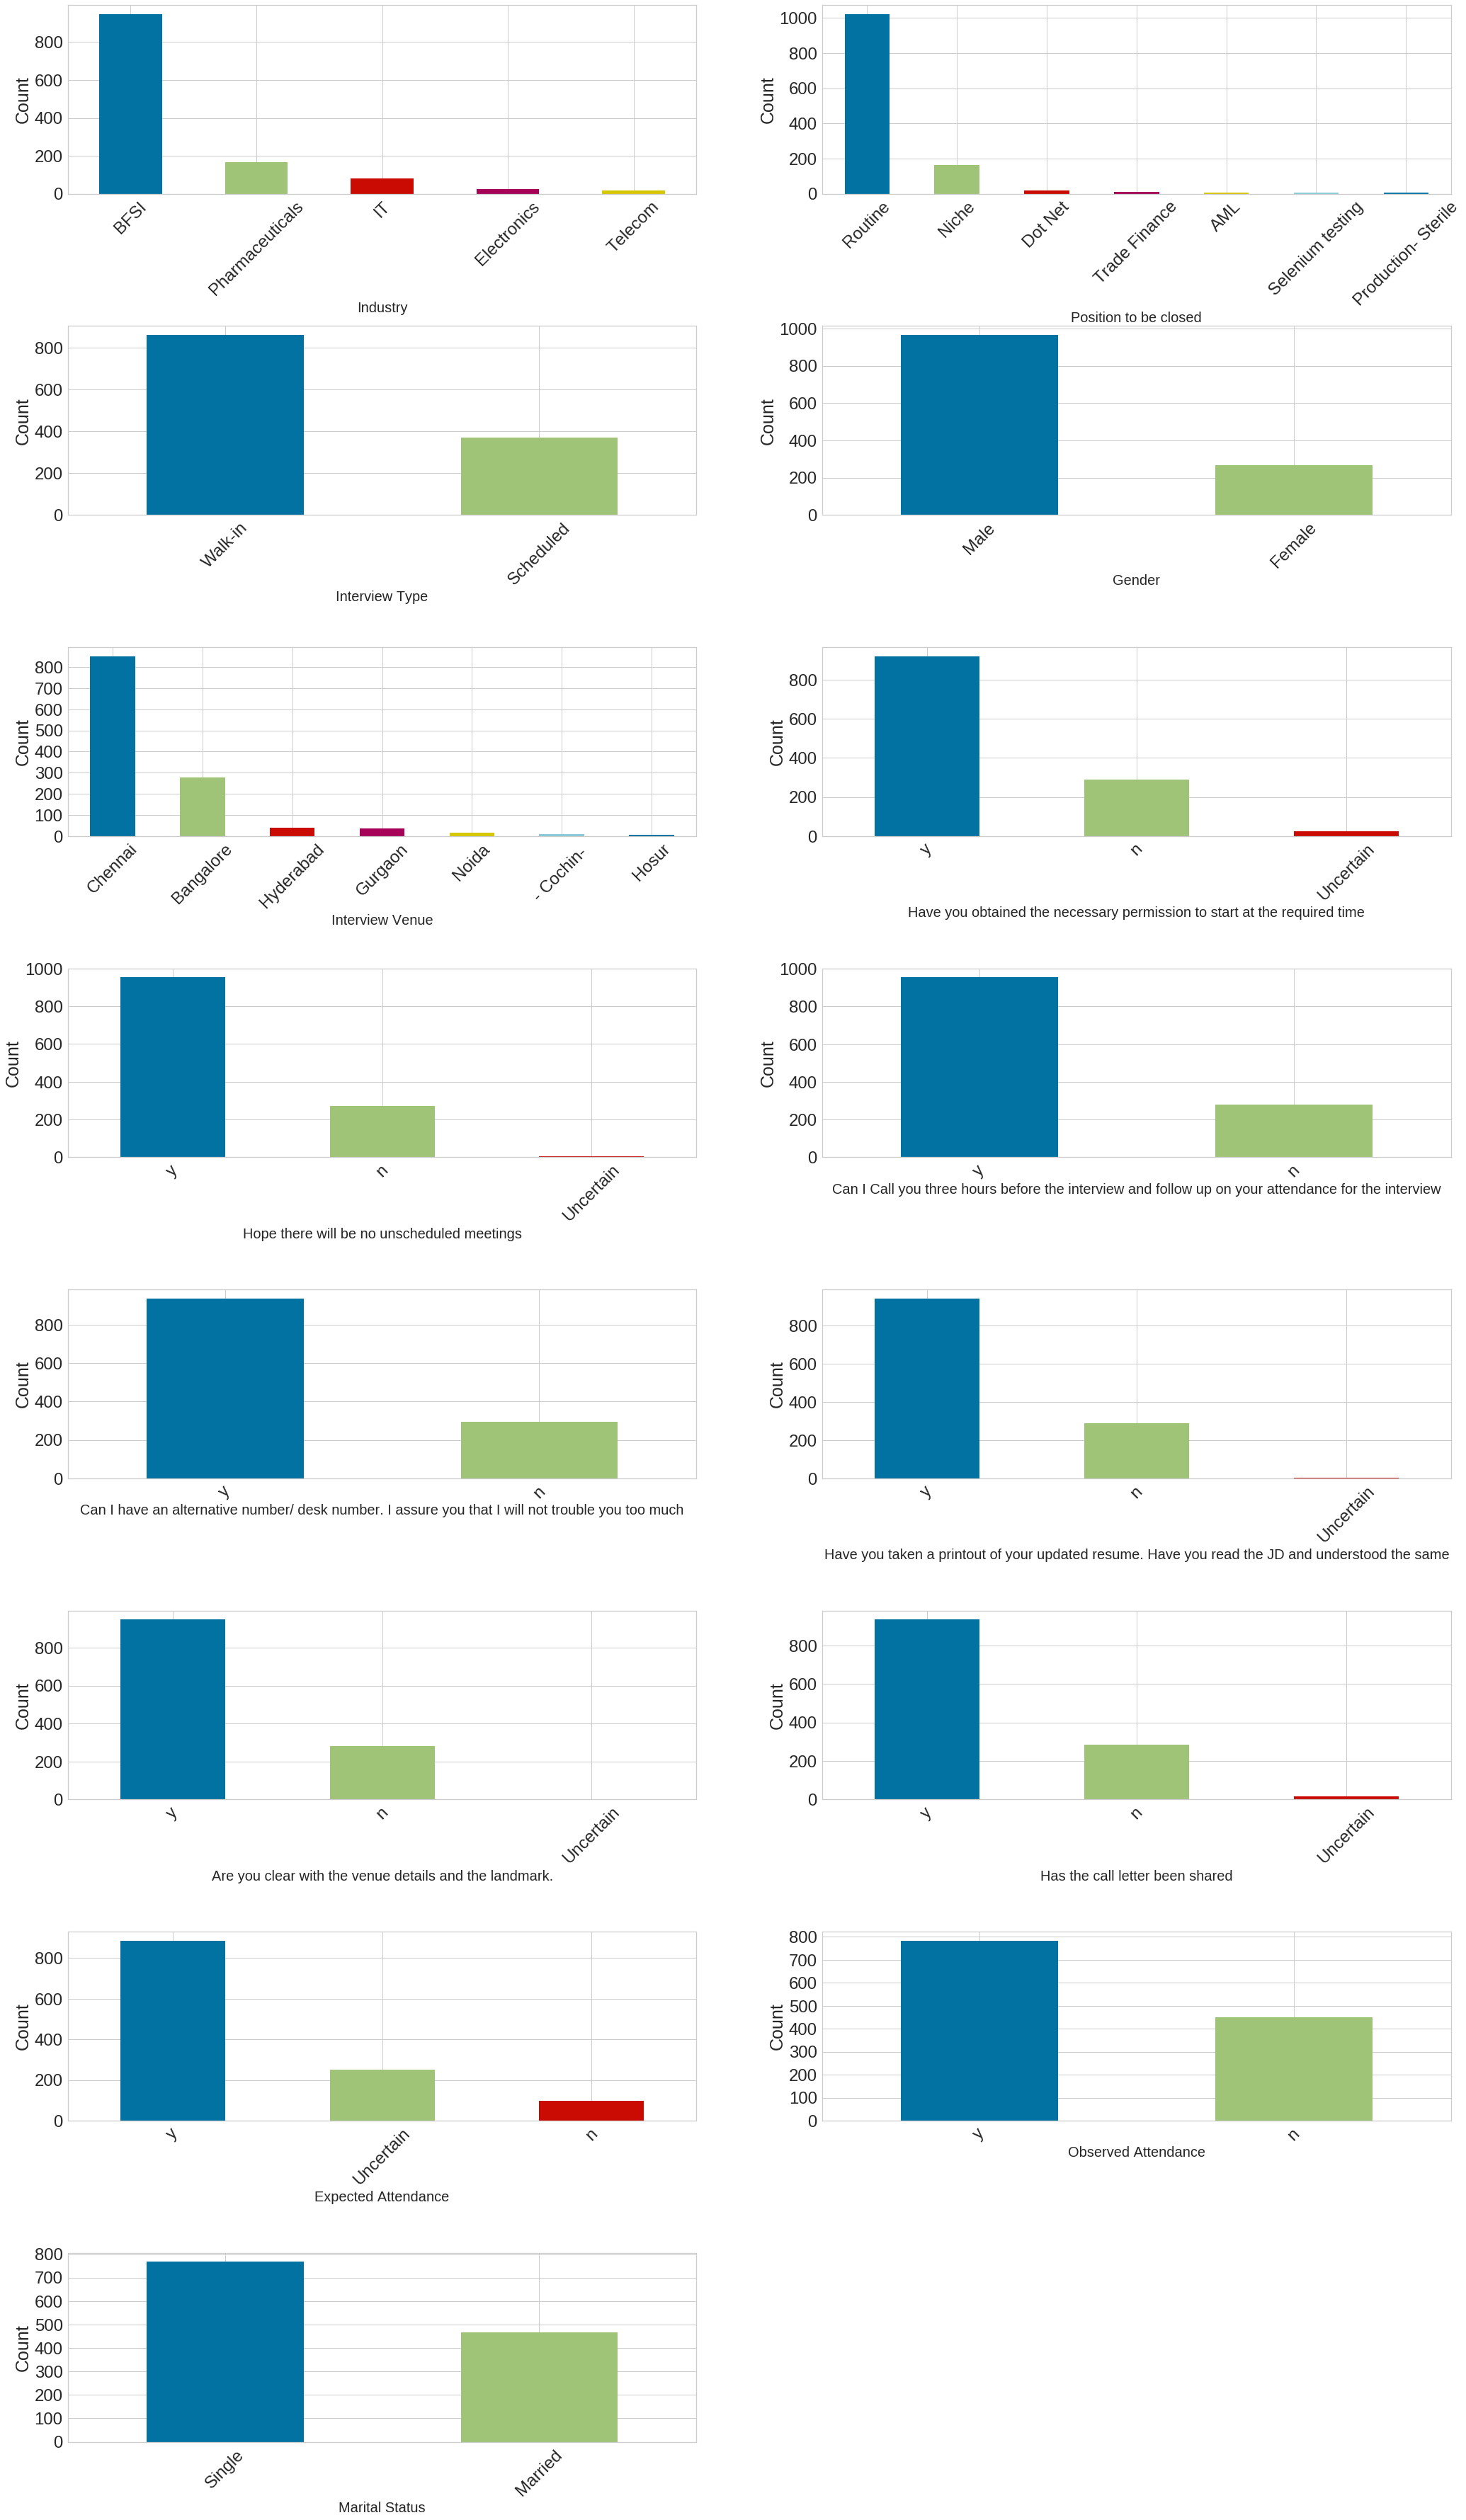

In [19]:
def cat_barplot():
    for n in range(0, (len(iview2.columns))):
        plt.subplot(10, 2, n+1)
        iview2.select_dtypes(include = ['object']).iloc[:,n].value_counts().plot(kind = 'bar')
        plt.xlabel(iview2.select_dtypes(include = ['object']).iloc[:,n].name, size = 20)
        plt.xticks(size=24, rotation=45)
        plt.yticks(size=24)
        #plt.legend(fontsize= 15)
        plt.ylabel('Count', size= 25)
        plt.subplots_adjust(hspace=.7)
plt.figure(figsize = (35, 80))
cat_barplot()
plt.show()
# Showing the classes in the features (categorical features)

In [20]:
y = pd.DataFrame(iview2.groupby(by = ['Marital Status', 'Observed Attendance'])['Expected Attendance'].count()).reset_index()
y

,Marital Status,Observed Attendance,Expected Attendance
0,Married,n,176
1,Married,y,290
2,Single,n,274
3,Single,y,493


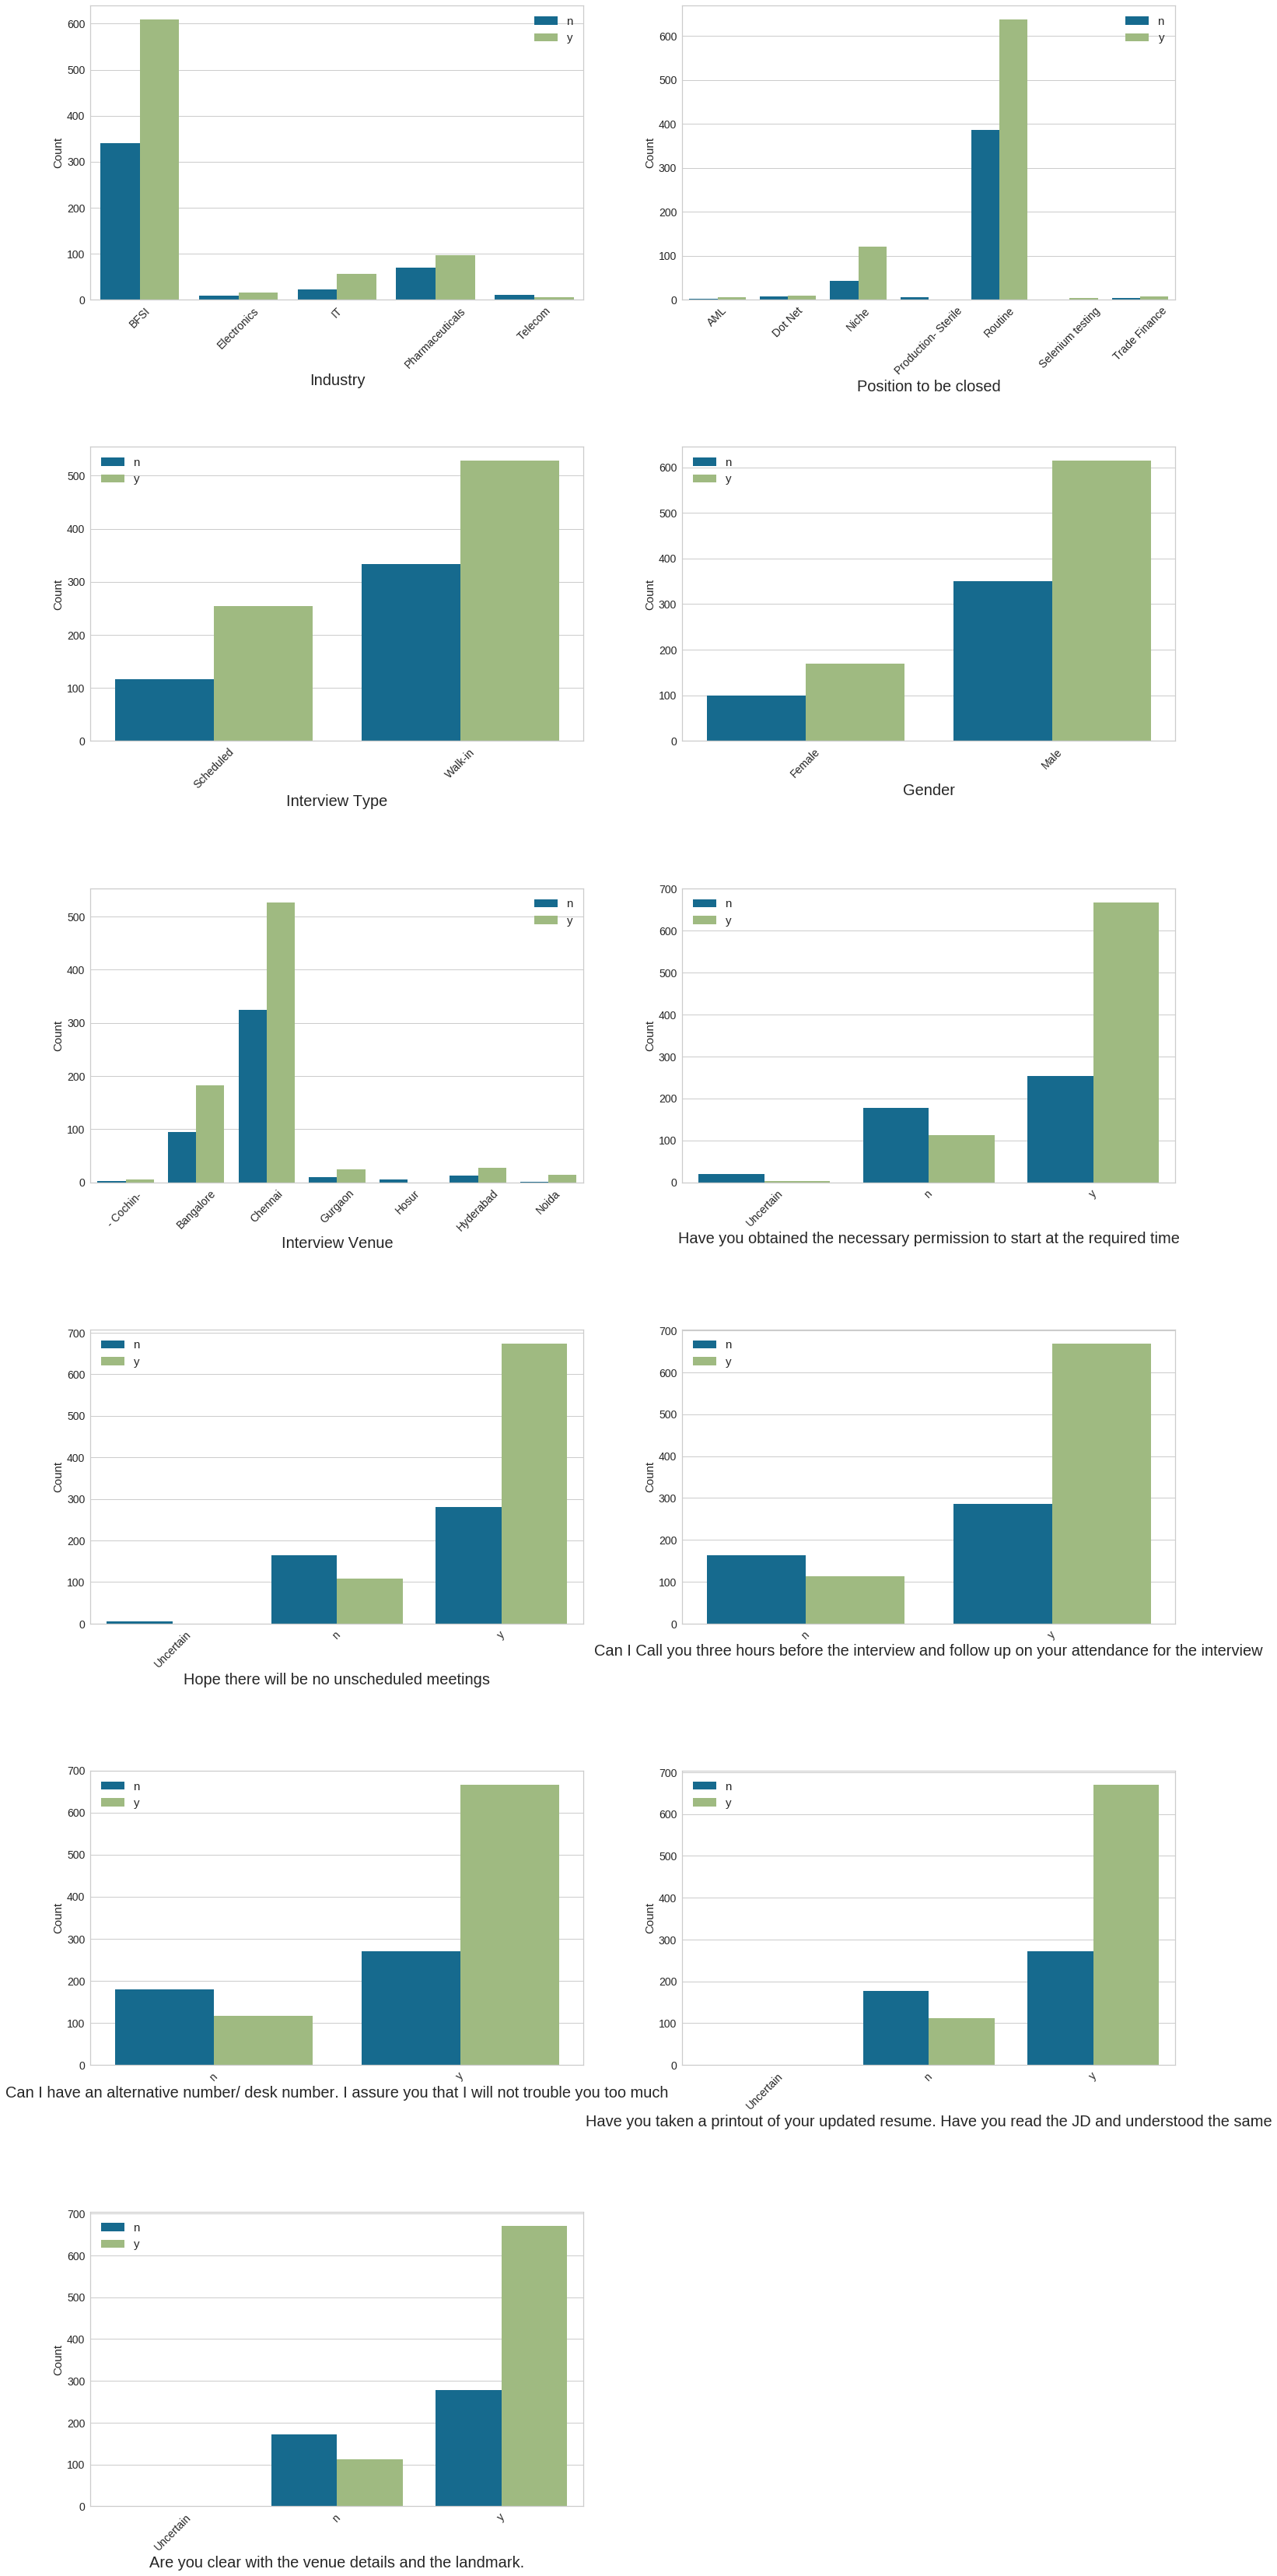

In [21]:
def func1():
    for n in range(0, len(iview2.columns[1:-3])):
        plt.subplot(8, 2, n+1)
        y = pd.DataFrame(iview2.groupby(by = [iview2.columns[n], 
                                              'Observed Attendance'])['Expected Attendance'].count()).reset_index()
        sns.barplot(x = iview2.columns[n], y = 'Expected Attendance', hue = 'Observed Attendance', data = y)
        plt.xlabel(iview2.columns[n], size = 20)
        plt.xticks(size=14, rotation=45)
        plt.yticks(size=14)
        plt.legend(fontsize= 15)
        plt.ylabel('Count', size= 15)
        plt.subplots_adjust(hspace=.5)
plt.figure(figsize = (25, 80))
func1()
plt.show()

In [22]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
iview3 = iview2.apply(le.fit_transform)

In [23]:
names = ['No', 'Yes']

In [24]:
X = iview3.drop(['Observed Attendance','Expected Attendance'], axis = 1)
y = iview3['Observed Attendance']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier

from yellowbrick.classifier import ConfusionMatrix

In [27]:
def model_fit(x):
    x.fit(X_train, y_train)
    y_pred = x.predict(X_test)
    model_fit.accuracy = accuracy_score(y_pred, y_test)
    print('Accuracy Score',accuracy_score(y_pred, y_test))
    print(classification_report(y_pred, y_test))
        
    classes = names
    model_cm = ConfusionMatrix(x, classes = classes, label_encoder = {0 : 'No', 1 : 'Yes'})
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.poof()  

In [28]:
# list = []
# for i in range(1,20):
#     model_fit(KNeighborsClassifier(n_neighbors = i))
#     list.append(model_fit.accuracy)
# list

Accuracy Score 0.7004048582995951
              precision    recall  f1-score   support

           0       0.39      0.60      0.47        55
           1       0.86      0.73      0.79       192

   micro avg       0.70      0.70      0.70       247
   macro avg       0.63      0.66      0.63       247
weighted avg       0.76      0.70      0.72       247



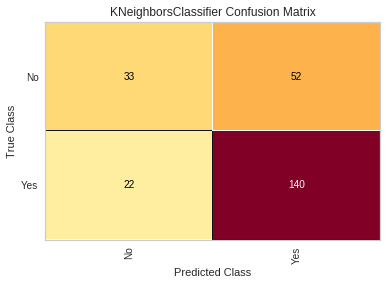

In [29]:
model_fit(KNeighborsClassifier(n_neighbors = 13))
KNN = model_fit.accuracy

Accuracy Score 0.7165991902834008
              precision    recall  f1-score   support

           0       0.38      0.65      0.48        49
           1       0.90      0.73      0.81       198

   micro avg       0.72      0.72      0.72       247
   macro avg       0.64      0.69      0.64       247
weighted avg       0.79      0.72      0.74       247



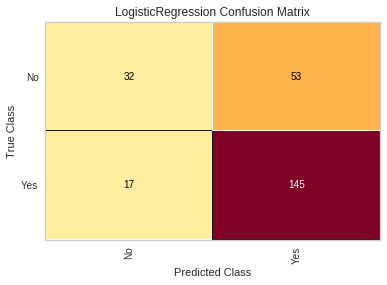

In [30]:
from sklearn.linear_model import LogisticRegression
model_fit(LogisticRegression())
Logistic = model_fit.accuracy

Accuracy Score 0.7206477732793523
              precision    recall  f1-score   support

           0       0.47      0.62      0.54        64
           1       0.85      0.75      0.80       183

   micro avg       0.72      0.72      0.72       247
   macro avg       0.66      0.69      0.67       247
weighted avg       0.75      0.72      0.73       247



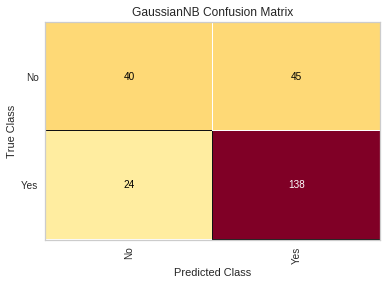

In [31]:
from sklearn.naive_bayes import GaussianNB
model_fit(GaussianNB())
Gaussian = model_fit.accuracy

Accuracy Score 0.7165991902834008
              precision    recall  f1-score   support

           0       0.48      0.61      0.54        67
           1       0.84      0.76      0.80       180

   micro avg       0.72      0.72      0.72       247
   macro avg       0.66      0.68      0.67       247
weighted avg       0.74      0.72      0.73       247



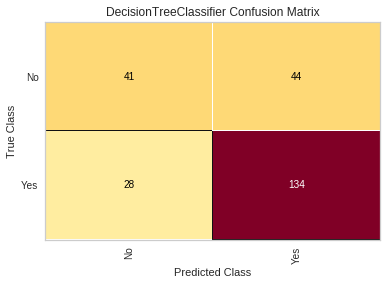

In [32]:
from sklearn import tree
model_fit(tree.DecisionTreeClassifier())
Tree = model_fit.accuracy

Accuracy Score 0.7368421052631579
              precision    recall  f1-score   support

           0       0.47      0.67      0.55        60
           1       0.88      0.76      0.81       187

   micro avg       0.74      0.74      0.74       247
   macro avg       0.67      0.71      0.68       247
weighted avg       0.78      0.74      0.75       247



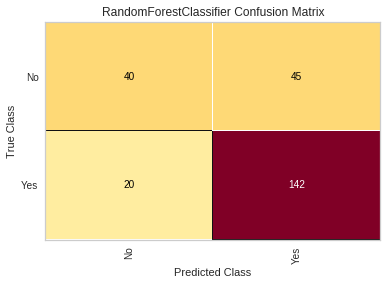

In [33]:
from sklearn.ensemble import RandomForestClassifier
model_fit(RandomForestClassifier(n_estimators = 100, max_depth =10, random_state = 1))
RandomForest = model_fit.accuracy

Accuracy Score 0.7327935222672065
              precision    recall  f1-score   support

           0       0.49      0.65      0.56        65
           1       0.86      0.76      0.81       182

   micro avg       0.73      0.73      0.73       247
   macro avg       0.68      0.70      0.68       247
weighted avg       0.76      0.73      0.74       247



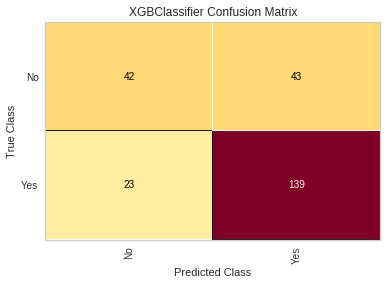

In [34]:
model_fit(XGBClassifier(max_depth=20, learning_rate=0.1, n_estimators=50, silent=True, 
                        objective='binary:logistic', booster='gbtree', n_jobs=1, 
                        nthread=None, gamma=0, min_child_weight=10, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=1, 
                        seed=1, missing=None))
XGBClf = model_fit.accuracy

Accuracy Score 0.7449392712550608
              precision    recall  f1-score   support

           0       0.53      0.66      0.59        68
           1       0.86      0.78      0.82       179

   micro avg       0.74      0.74      0.74       247
   macro avg       0.69      0.72      0.70       247
weighted avg       0.77      0.74      0.75       247



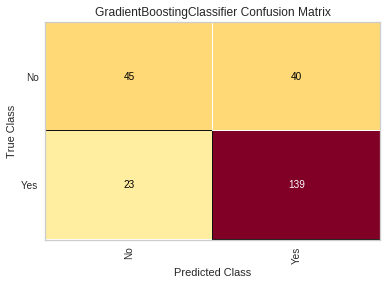

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
model_fit(GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=220, subsample=1.0, 
                           criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_decrease=0.0, 
                           min_impurity_split=None, init=None, random_state=1, max_features=None, 
                           verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', 
                           validation_fraction=0.1, n_iter_no_change=None, tol=0.0001))
GradientClf = model_fit.accuracy

In [36]:
save_file = pd.DataFrame(GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=220, subsample=1.0, 
                           criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_depth=2, min_impurity_decrease=0.0, 
                           min_impurity_split=None, init=None, random_state=1, max_features=None, 
                           verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', 
                           validation_fraction=0.1, n_iter_no_change=None, tol=0.0001).fit(X_train, y_train).predict(X_test), iview['Name(Cand ID)'][X_test.index])
save_file.rename(columns = {0 : 'Attendance Prediction: 1=Yes, 0=No'}).to_csv('Interview_Data.csv')
#Download test results to file with Candidate ID included.

In [37]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /home/m/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpyol_9qbp
  JVM stdout: /tmp/tmpyol_9qbp/h2o_m_started_from_python.out
  JVM stderr: /tmp/tmpyol_9qbp/h2o_m_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,06 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.0.2
H2O cluster version age:,1 month and 23 days
H2O cluster name:,H2O_from_python_m_vwqcyl
H2O cluster total nodes:,1
H2O cluster free memory:,1.377 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [92]:
# Load data into H2O
df = h2o.H2OFrame(iview3)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [117]:
df.describe()

Rows:1233
Cols:15




,Industry,Position to be closed,Interview Type,Gender,Interview Venue,Have you obtained the necessary permission to start at the required time,Hope there will be no unscheduled meetings,Can I Call you three hours before the interview and follow up on your attendance for the interview,Can I have an alternative number/ desk number. I assure you that I will not trouble you too much,Have you taken a printout of your updated resume. Have you read the JD and understood the same,Are you clear with the venue details and the landmark.,Has the call letter been shared,Expected Attendance,Observed Attendance,Marital Status
type,int,int,int,int,int,int,int,int,int,int,int,int,int,enum,int
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,0.0
mean,0.6034063260340639,3.683698296836984,0.6991078669910786,0.7826439578264396,1.9432278994322802,1.7283049472830503,1.7688564476885655,0.7745336577453366,0.7599351175993512,1.7623682076236793,1.7672343876723433,1.7453365774533642,1.5150040551500419,,0.6220600162206001
maxs,4.0,6.0,1.0,1.0,6.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,,1.0
sigma,1.1562456365065639,0.8416136787303268,0.4588319963290136,0.4126141918855456,0.8845838559356763,0.4851547461489934,0.43312898823264645,0.418058628575349,0.4272959325440336,0.42960065724194396,0.4265881987163507,0.46294133499088946,0.8098282370493772,,0.4850692542926882
zeros,949,8,371,268,9,23,6,278,296,2,2,15,250,,466
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,3.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0,1.0
1,3.0,3.0,1.0,1.0,4.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0,1.0
2,3.0,3.0,1.0,1.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0,1.0


In [94]:
df[y] = df[y].asfactor()

In [95]:
splits = df.split_frame(ratios = [0.8], seed = 1)
train_aml = splits[0]
test = splits[1]

In [96]:
y = "Observed Attendance"
x = train_aml.columns
x.remove(y)
#test.remove(y)
#x.remove("sku")

In [97]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y, training_frame = train_aml)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [100]:
aml.leaderboard

model_id,auc,logloss,mean_per_class_error,rmse,mse
XGBoost_2_AutoML_20190114_122318,0.696574,0.571186,0.403826,0.440763,0.194272
GBM_2_AutoML_20190114_122318,0.695117,0.567398,0.407621,0.439819,0.193441
GBM_3_AutoML_20190114_122318,0.694866,0.567946,0.407621,0.439986,0.193588
XRT_1_AutoML_20190114_122318,0.694652,0.66433,0.421281,0.449498,0.202048
GBM_4_AutoML_20190114_122318,0.693869,0.567939,0.407621,0.439972,0.193576
StackedEnsemble_BestOfFamily_AutoML_20190114_122318,0.692528,0.569937,0.406063,0.441297,0.194743
XGBoost_1_AutoML_20190114_122318,0.691159,0.562213,0.402948,0.437758,0.191632
StackedEnsemble_AllModels_AutoML_20190114_122318,0.68838,0.568224,0.404505,0.440612,0.194139
DRF_1_AutoML_20190114_122318,0.687576,0.669053,0.402909,0.450417,0.202875
XGBoost_3_AutoML_20190114_122318,0.686026,0.600381,0.395962,0.454029,0.206143


In [101]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [102]:
metalearner.coef_norm()

{'Intercept': 0.6184781769759677,
 'XGBoost_2_AutoML_20190114_122318': 0.2565813902225635,
 'GBM_2_AutoML_20190114_122318': 0.0,
 'GBM_3_AutoML_20190114_122318': 0.0,
 'XRT_1_AutoML_20190114_122318': 0.0,
 'GBM_4_AutoML_20190114_122318': 0.0,
 'XGBoost_1_AutoML_20190114_122318': 0.7414140212689502,
 'DRF_1_AutoML_20190114_122318': 0.0,
 'XGBoost_3_AutoML_20190114_122318': 0.0,
 'GBM_1_AutoML_20190114_122318': 0.0,
 'GLM_grid_1_AutoML_20190114_122318_model_1': 0.0}

/home/m/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/m/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/home/m/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


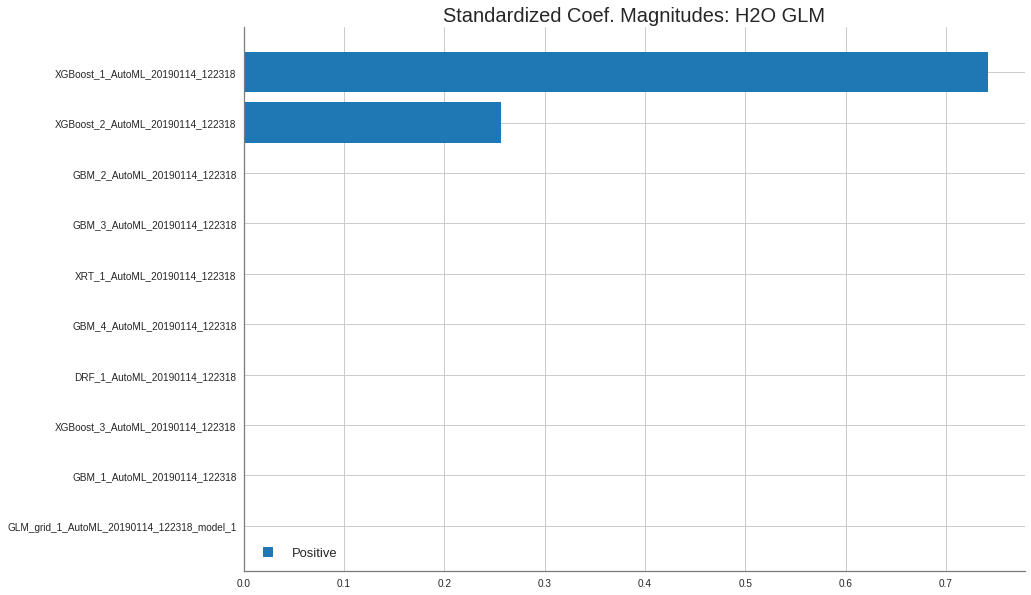

In [103]:
metalearner.std_coef_plot()

In [104]:
pred = aml.predict(test)
pred.head()

xgboost prediction progress: |████████████████████████████████████████████| 100%


predict,p0,p1
1,0.516002,0.483998
1,0.266042,0.733958
0,0.773767,0.226233
1,0.330654,0.669346
1,0.32668,0.67332
1,0.32668,0.67332
1,0.32668,0.67332
1,0.330654,0.669346
1,0.330654,0.669346
1,0.308392,0.691608


In [112]:
pred = pred['predict'].as_data_frame().predict
pred.value_counts()

1    211
0     37
Name: predict, dtype: int64

In [113]:
amlCLF = accuracy_score(pred, test[['Observed Attendance']].as_data_frame())
amlCLF

0.7298387096774194

In [114]:
scores_list_1 = ['KNN','Logistic','Gaussian','Tree','RandomForest','XGBClassifier', 'GradientClassifier','amlCLF']
scores_1 = [KNN, Logistic, Gaussian, Tree, RandomForest, XGBClf, GradientClf, amlCLF]

In [115]:
score_df_classification = pd.DataFrame([scores_list_1, scores_1]).T

In [116]:
score_df_classification.index = score_df_classification[0]
del score_df_classification[0]
score_df_classification

,1
0,
KNN,0.700405
Logistic,0.716599
Gaussian,0.720648
Tree,0.716599
RandomForest,0.736842
XGBClassifier,0.732794
GradientClassifier,0.744939
amlCLF,0.729839


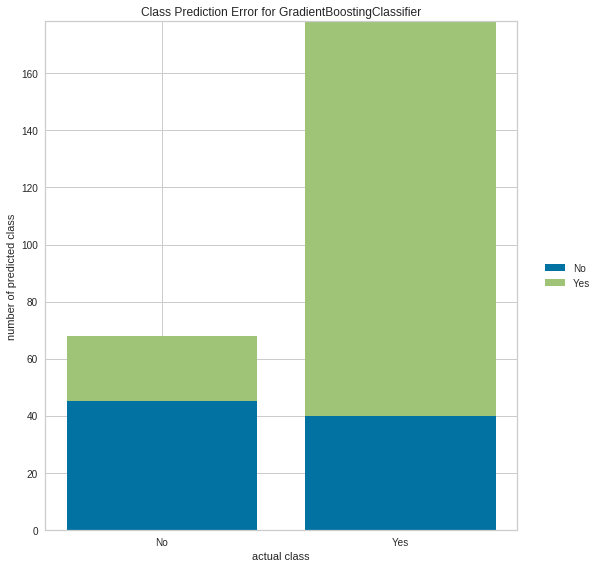

In [56]:
#Generalized confusion matrix
fig = plt.figure(figsize = (10,8))
visualizer = ClassPredictionError(GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                                             n_estimators=220, subsample=1.0, 
                                                             criterion='friedman_mse', min_samples_split=2, 
                                                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                                             max_depth=2, min_impurity_decrease=0.0, 
                                                             min_impurity_split=None, init=None, 
                                                             random_state=1, max_features=None, verbose=0, 
                                                             max_leaf_nodes=None, warm_start=False, 
                                                             presort='auto', validation_fraction=0.1, 
                                                             n_iter_no_change=None, tol=0.0001), classes = names)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.poof()

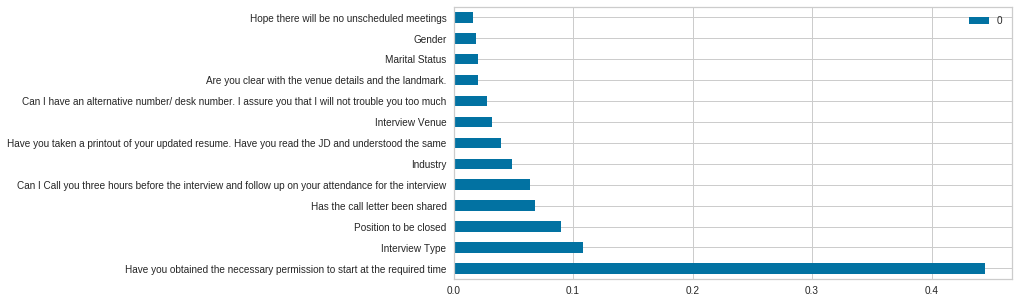

In [57]:
m = (GradientBoostingClassifier(loss='deviance', learning_rate=0.1, 
                                                             n_estimators=220, subsample=1.0, 
                                                             criterion='friedman_mse', min_samples_split=2, 
                                                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                                             max_depth=2, min_impurity_decrease=0.0, 
                                                             min_impurity_split=None, init=None, 
                                                             random_state=1, max_features=None, verbose=0, 
                                                             max_leaf_nodes=None, warm_start=False, 
                                                             presort='auto', validation_fraction=0.1, 
                                                             n_iter_no_change=None, tol=0.0001).fit(X_train, 
                                                                                                    y_train))
x = pd.DataFrame(m.feature_importances_,X_train.columns)
pd.DataFrame(x[0].sort_values(ascending = False)[0:20]).iloc[:,:1].plot.barh(figsize=(10,5))
plt.show()

![](https://cdn-images-1.medium.com/max/1600/1*E6XGg8p4F1B2tIX5tUhYMA.png)

https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-9-neural-networks-with-tfidf-vectors-using-d0b4af6be6d7

Logistic regression can be thought as a neural network with no hidden layer, and just one output node.

In [58]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


In [59]:
predictor = iview3.drop(['Observed Attendance','Expected Attendance'], axis = 1).as_matrix()
target = to_categorical(iview3['Observed Attendance'])

ncols = predictor.shape[1]
# The very first layer of Keras needs to have the number of columns in the X data 

In [60]:
model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (ncols,)))
for i in range (1,20):
    model.add(Dense(i,activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))
# softmax is a part of gradient descent 
# 'relu' = Rectified Linear Unit - the most commonly used activation function in deep learning models. 
# The function returns 0 if it receives any negative input, but for any positive value  x  it returns 
# that value back. So it can be written as  f(x)=max(0,x) . 

In [61]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
custom_adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# ADAM helps us achieve the lowest point in the valley and the best learning rate
# ADAM is an optimisation algorithm for updating the parameters and minimising the cost of 
# the neural network, which is proved to be very effective.
# Categorical is for logistic regression
# https://keras.io/optimizers/

In [62]:
model.fit(predictor, target, verbose=1)

Epoch 1/1
1233/1233 [==============================] - ETA: 1:08 - loss: 0.6931 - acc: 0.250 - ETA: 12s - loss: 0.6929 - acc: 0.481 - ETA: 4s - loss: 0.6920 - acc: 0.5682 - ETA: 2s - loss: 0.6911 - acc: 0.590 - ETA: 0s - loss: 0.6892 - acc: 0.617 - ETA: 0s - loss: 0.6883 - acc: 0.618 - 2s 2ms/step - loss: 0.6878 - acc: 0.6156
